# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import (weather_api_key,g_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
#print((list(lat_lngs)))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

['vila', 'mataura', 'saskylakh', 'qaanaaq', 'svetlyy', 'rikitea', 'cascais', 'amderma', 'souillac', 'bonavista', 'nizhneyansk', 'pisco', 'kapaa', 'tsihombe', 'tuatapere', 'price', 'palembang', 'capitan bado', 'ushuaia', 'auki', 'tura', 'mys shmidta', 'calabozo', 'iqaluit', 'vila franca do campo', 'saint-philippe', 'makakilo city', 'cherskiy', 'butaritari', 'narsaq', 'skibbereen', 'palabuhanratu', 'santa rosa', 'muros', 'khatanga', 'bluff', 'sept-iles', 'hilo', 'albany', 'jamestown', 'vaini', 'barrow', 'mankachar', 'barentsburg', 'adrar', 'beringovskiy', 'castro', 'yvetot', 'coihaique', 'sioux lookout', 'new norfolk', 'port alfred', 'pimentel', 'airai', 'hovd', 'taolanaro', 'codrington', 'zhigansk', 'lagoa', 'shelburne', 'hermanus', 'vilhena', 'cape town', 'acarau', 'abu samrah', 'marystown', 'victoria', 'busselton', 'lebu', 'rio grande', 'nanortalik', 'ilulissat', 'iranshahr', 'sogdiondon', 'korla', 'vestmanna', 'tawkar', 'dikson', 'kaohsiung', 'yellowknife', 'mahebourg', 'sidvokodvo',

In [25]:
cities2=[]
for i in range(2):
    cities2.append(cities[i+2])
cities2

['saskylakh', 'qaanaaq']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [45]:
cities_list=[]
lat_list=[]
lng_list=[]
temp_list=[]
humi_list=[]
clou_list=[]
wind_list=[]
coun_list=[]
date_list=[]
i=1
we_url='https://api.openweathermap.org/data/2.5/weather?'
ge_url='https://maps.googleapis.com/maps/api/geocode/json?'
for city in cities:
    ge_params={
        'address':city,
        'key':g_key
    }
    city_js=requests.get(ge_url,params=ge_params).json()
    try:
        
        lat=city_js['results'][0]['geometry']['location']['lat']
        lng=city_js['results'][0]['geometry']['location']['lng']
        country=city_js['results'][0]['address_components'][2]['long_name']
        cities_list.append(city)
        lat_list.append(lat)
        lng_list.append(lng)
        coun_list.append(country)
    except:
        print(f'City {city} not found. Skipping...')
        continue

    we_params={
        'lat':lat,
        'lon':lng,
        'units':'metric',
        'appid':weather_api_key
    }
    weather_js=requests.get(we_url,params=we_params).json()
    try:
        temp=weather_js['main']['temp_max']
        humi=weather_js['main']['humidity']
        clou=weather_js['clouds']['all']
        wind=weather_js['wind']['speed']
        date=weather_js['dt']
        temp_list.append(temp)
        humi_list.append(humi)
        clou_list.append(clou)
        wind_list.append(wind)
        date_list.append(date)
    except:
        print(f'City {city} weather not found. Skipping...')
        continue
    print(f'Processing Record {i} | {city}')
    i=i+1
    if (i > 500):
        print(f'500 cities is enough')
        break


City vila not found. Skipping...
Processing Record 1 | mataura
Processing Record 2 | saskylakh
Processing Record 3 | qaanaaq
Processing Record 4 | svetlyy
Processing Record 5 | rikitea
Processing Record 6 | cascais
Processing Record 7 | amderma
Processing Record 8 | souillac
Processing Record 9 | bonavista
Processing Record 10 | nizhneyansk
City pisco not found. Skipping...
Processing Record 11 | kapaa
Processing Record 12 | tsihombe
Processing Record 13 | tuatapere
City price not found. Skipping...
Processing Record 14 | palembang
Processing Record 15 | capitan bado
Processing Record 16 | ushuaia
Processing Record 17 | auki
Processing Record 18 | tura
Processing Record 19 | mys shmidta
Processing Record 20 | calabozo
Processing Record 21 | iqaluit
Processing Record 22 | vila franca do campo
Processing Record 23 | saint-philippe
Processing Record 24 | makakilo city
Processing Record 25 | cherskiy
City butaritari not found. Skipping...
Processing Record 26 | narsaq
Processing Record 27 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
cities_df=pd.DataFrame({'City':cities_list,'Lat':lat_list,'Lng':lng_list,'Max Temp':temp_list,'Humidity':humi_list,'Cloudiness':clou_list,'Wind Speed':wind_list,'Country':coun_list,'Date':date_list}) 

cities_df.to_csv(output_data_file)
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.193952,168.865478,8.60,95,61,0.76,New Zealand,1662708397
1,saskylakh,71.954308,114.119835,4.32,97,100,5.76,Sakha Republic,1662708398
2,qaanaaq,77.467043,-69.228483,-2.61,74,10,3.12,Greenland,1662708399
3,svetlyy,50.820238,60.851560,17.19,28,100,5.15,Orenburg Oblast,1662708400
4,rikitea,-23.122303,-134.969154,22.69,69,0,9.08,The Tuamotu and Gambier Islands,1662708401
...,...,...,...,...,...,...,...,...,...
495,noumea,-22.273491,166.448089,24.27,99,100,3.56,New Caledonia,1662709009
496,tocopilla,-22.088678,-70.196054,14.12,71,20,1.86,Tocopilla Province,1662709010
497,othonoi,39.841793,19.406447,27.76,80,0,7.59,Greece,1662709011
498,paradwip,20.316552,86.611363,30.22,75,86,8.86,Odisha,1662709012


In [48]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,21.188046,14.328619,19.820840,70.200000,52.172000,3.593820,1.662709e+09
std,33.169941,92.928450,8.401345,21.526979,41.497597,2.509336,1.883805e+02
min,-54.801912,-179.412597,-2.610000,6.000000,0.000000,0.000000,1.662708e+09
25%,-7.762243,-68.538041,13.420000,60.000000,4.000000,1.740000,1.662709e+09
50%,25.314721,24.172966,21.270000,75.000000,57.500000,3.095000,1.662709e+09
75%,49.649611,90.241738,26.027500,87.000000,99.000000,5.077500,1.662709e+09
max,78.223172,179.348539,38.340000,100.000000,100.000000,13.440000,1.662709e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [56]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data=cities_df.loc[cities_df['Humidity']<=100]


In [57]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.193952,168.865478,8.60,95,61,0.76,New Zealand,1662708397
1,saskylakh,71.954308,114.119835,4.32,97,100,5.76,Sakha Republic,1662708398
2,qaanaaq,77.467043,-69.228483,-2.61,74,10,3.12,Greenland,1662708399
3,svetlyy,50.820238,60.851560,17.19,28,100,5.15,Orenburg Oblast,1662708400
4,rikitea,-23.122303,-134.969154,22.69,69,0,9.08,The Tuamotu and Gambier Islands,1662708401
...,...,...,...,...,...,...,...,...,...
495,noumea,-22.273491,166.448089,24.27,99,100,3.56,New Caledonia,1662709009
496,tocopilla,-22.088678,-70.196054,14.12,71,20,1.86,Tocopilla Province,1662709010
497,othonoi,39.841793,19.406447,27.76,80,0,7.59,Greece,1662709011
498,paradwip,20.316552,86.611363,30.22,75,86,8.86,Odisha,1662709012


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [ ]:
import datetime
today=datetime.date.today()

## Latitude vs. Temperature Plot

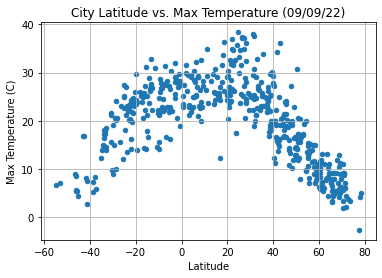

In [96]:
lat_temp_df=clean_city_data[['Lat','Max Temp']]
lat_temp_df.plot.scatter(x='Lat',y='Max Temp',grid=True)

plt.title(f"City Latitude vs. Max Temperature ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

The above scatter plot show some relationship between latitude and the max temperature.

## Latitude vs. Humidity Plot

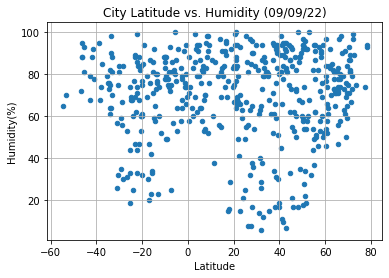

In [97]:
lat_temp_df=clean_city_data[['Lat','Humidity']]
lat_temp_df.plot.scatter(x='Lat',y='Humidity',grid=True)

plt.title(f"City Latitude vs. Humidity ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

The above scatter plot show some relationship between latitude and humidity.

## Latitude vs. Cloudiness Plot

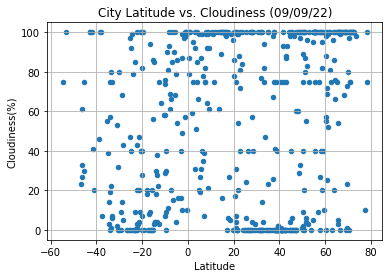

In [98]:
lat_temp_df=clean_city_data[['Lat','Cloudiness']]
lat_temp_df.plot.scatter(x='Lat',y='Cloudiness',grid=True)

plt.title(f"City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()

The above scatter plot show some relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

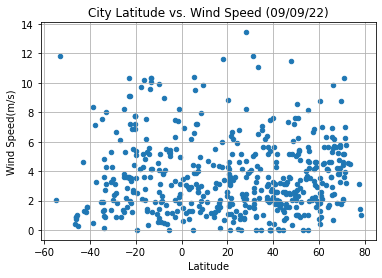

In [99]:
lat_temp_df=clean_city_data[['Lat','Wind Speed']]
lat_temp_df.plot.scatter(x='Lat',y='Wind Speed',grid=True)

plt.title(f"City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.show()

The above scatter plot show some relationship between latitude and wind speed.

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

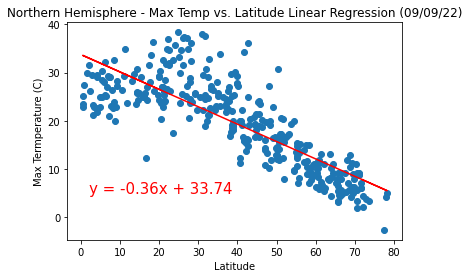

In [115]:
from scipy.stats import linregress

lat_temp_df1=clean_city_data[['Lat','Max Temp']]
lat_temp_n_df=lat_temp_df1[lat_temp_df1['Lat'] > 0]
lat_temp_n_df.plot.scatter(x='Lat',y='Max Temp')

x_values = lat_temp_n_df['Lat']
y_values = lat_temp_n_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Termperature (C)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

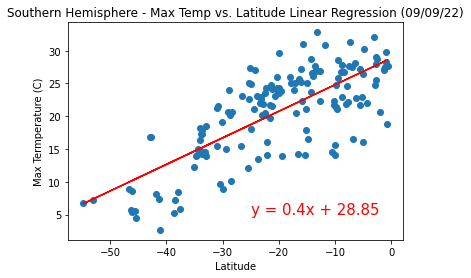

In [116]:
from scipy.stats import linregress

lat_temp_df1=clean_city_data[['Lat','Max Temp']]
lat_temp_s_df=lat_temp_df1[lat_temp_df1['Lat'] < 0]
lat_temp_s_df.plot.scatter(x='Lat',y='Max Temp')

x_values = lat_temp_s_df['Lat']
y_values = lat_temp_s_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Termperature (C)')
plt.show()

#### ___Approach the equator, the weather gets hotter than high latitude.___

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

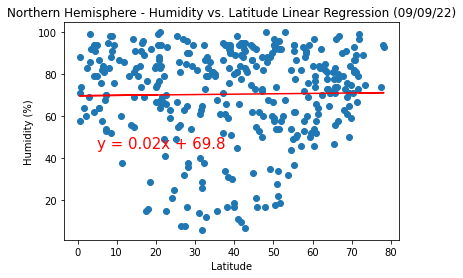

In [124]:
from scipy.stats import linregress

lat_humi_df1=clean_city_data[['Lat','Humidity']]
lat_humi_n_df=lat_humi_df1[lat_humi_df1['Lat'] > 0]
lat_humi_n_df.plot.scatter(x='Lat',y='Humidity')

x_values = lat_humi_n_df['Lat']
y_values = lat_humi_n_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

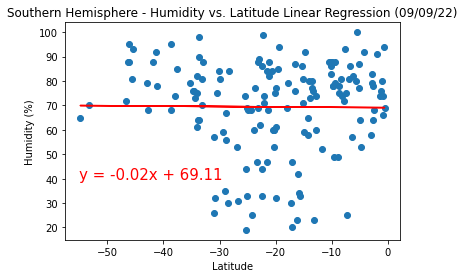

In [125]:
from scipy.stats import linregress

lat_humi_df1=clean_city_data[['Lat','Humidity']]
lat_humi_s_df=lat_humi_df1[lat_humi_df1['Lat'] < 0]
lat_humi_s_df.plot.scatter(x='Lat',y='Humidity')

x_values = lat_humi_s_df['Lat']
y_values = lat_humi_s_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

#### ___The humidity almost is not relationship with latitude.___

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

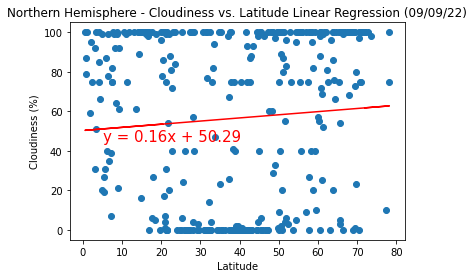

In [126]:
from scipy.stats import linregress

lat_clou_df1=clean_city_data[['Lat','Cloudiness']]
lat_clou_n_df=lat_clou_df1[lat_clou_df1['Lat'] > 0]
lat_clou_n_df.plot.scatter(x='Lat',y='Cloudiness')

x_values = lat_clou_n_df['Lat']
y_values = lat_clou_n_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

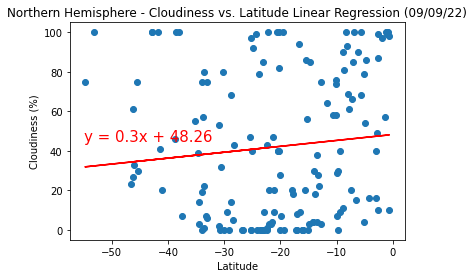

In [128]:
from scipy.stats import linregress

lat_clou_df1=clean_city_data[['Lat','Cloudiness']]
lat_clou_s_df=lat_clou_df1[lat_clou_df1['Lat'] < 0]
lat_clou_s_df.plot.scatter(x='Lat',y='Cloudiness')

x_values = lat_clou_s_df['Lat']
y_values = lat_clou_s_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#### ___According scatter plot, cloudiness is not relationship with latitude.___

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

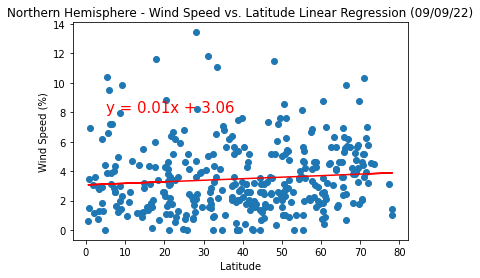

In [130]:
from scipy.stats import linregress

lat_wind_df1=clean_city_data[['Lat','Wind Speed']]
lat_wind_n_df=lat_wind_df1[lat_wind_df1['Lat'] > 0]
lat_wind_n_df.plot.scatter(x='Lat',y='Wind Speed')

x_values = lat_wind_n_df['Lat']
y_values = lat_wind_n_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,8),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

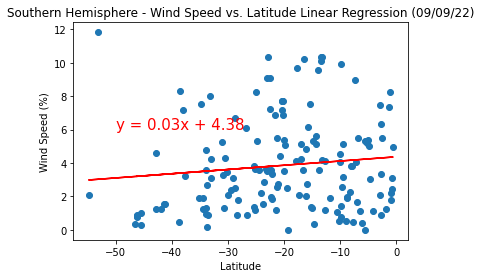

In [132]:
from scipy.stats import linregress

lat_wind_df1=clean_city_data[['Lat','Wind Speed']]
lat_wind_s_df=lat_wind_df1[lat_wind_df1['Lat'] < 0]
lat_wind_s_df.plot.scatter(x='Lat',y='Wind Speed')

x_values = lat_wind_s_df['Lat']
y_values = lat_wind_s_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.show()

#### ___According scatter plot, wind speed is not relationship with latitude.___